In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm
from common import Fonts, Colors, add_twitter_handle, add_source

<Figure size 4800x2400 with 0 Axes>

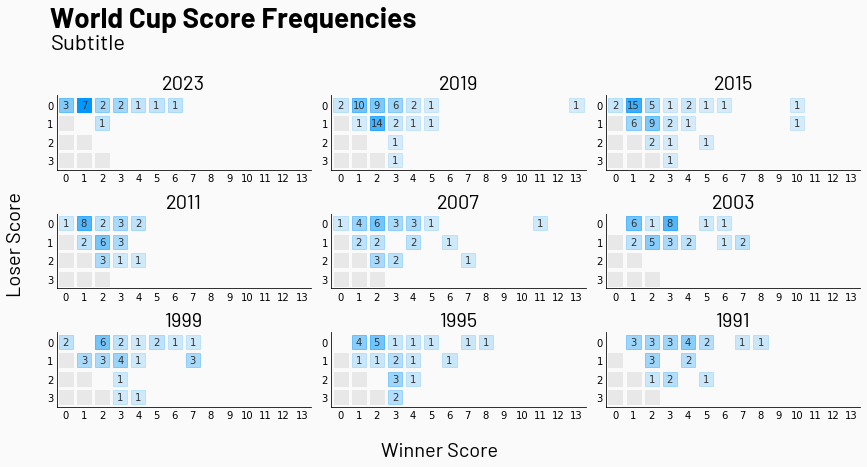

In [90]:
empty = pd.DataFrame(
    [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]], columns=["max", "min"]
)


def plot_scores_by_year(ax, year):
    df = pd.read_csv("data/matches_" + str(year) + ".csv")
    df["min"] = df[["home_score", "away_score"]].min(axis=1)
    df["max"] = df[["home_score", "away_score"]].max(axis=1)
    group = (
        df.groupby(["min", "max"]).agg(count=("match_number", "count")).reset_index()
    )
    group["pct"] = group["count"] / group["count"].sum()
    max_pct = 0.39
    assert group["pct"].max() <max_pct
    ax.scatter(
        group["max"],
        group["min"],
        alpha=0.1 + (group["pct"])*0.9/(max_pct),
        color="#0098FF",
        marker="s",
        s=200,
    )
    ax.scatter(empty["max"], empty["min"], marker="s", s=200, color="#E8E8E8")
    
    for i, row in group.iterrows():
        ax.text(row["max"], row["min"], int(row["count"]), color=Colors.BLACK, ha="center", va="center")

    ax.set_title(str(year), fontproperties=Fonts.BARLOW, size=20)
    ax.set_xlim([-0.5, 13.5])
    ax.set_xticks(range(0, 14))
    ax.set_ylim([3.5, -0.5])
    ax.set_yticks(range(3, -1, -1))

    ax.spines[["top", "right"]].set_visible(False)
    ax.tick_params(axis="both", which="both", length=0)


plt.rcParams["figure.figsize"] = (12, 6)
plt.figure(dpi=400)
fig, axs = plt.subplots(3, 3)
fig.patch.set_facecolor(Colors.WHITE)

years = list(range(1991, 2024, 4))
years.reverse()
for i, year in enumerate(years):
    ax = axs[math.floor(i / 3), i % 3]
    ax.set_facecolor(Colors.WHITE)
    plot_scores_by_year(ax, year)


fig.suptitle(
    "World Cup Score Frequencies",
    fontproperties=Fonts.BARLOW_BOLD,
    size=28,
    x=0.05,
    y=1.05,
    ha="left",
)
fig.text(0.05, 0.95, "Subtitle", fontproperties=Fonts.BARLOW, size=22, ha="left")
fig.supxlabel("Winner Score", y=0.0, fontproperties=Fonts.BARLOW, size=20)
fig.supylabel("Loser Score", x=0.0, fontproperties=Fonts.BARLOW, size=20)

fig.tight_layout()
plt.show()